# Statistical Analysis - House pricing

    - Goal: Find the most important factors contributing in Housing Sales Price and create model for prediction

### Approach
1. Examine dataset and columns' interpretations
2. Data cleaning and Manipulations
3. Data Exploration
4. Modeling
5. Summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.impute import SimpleImputer



pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1. Explore data frame and examine columns

In [3]:
# Dataframe dimention: 1460 records with 81 columns including dependent variables 'SalePrice'
df.shape

(1460, 81)

In [4]:
# Half of the columns seem to be categorical data. 
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


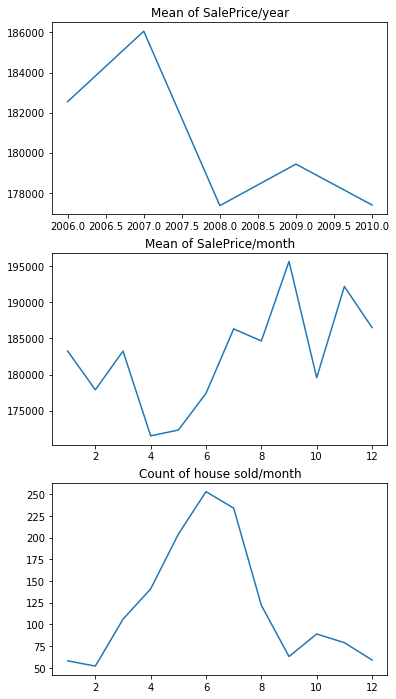

In [6]:
# Trend of SalePrice

fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(6,12),)
axes[0].plot(df.groupby('YrSold')['SalePrice'].mean());
axes[0].set_title('Mean of SalePrice/year');
axes[1].plot(df.groupby('MoSold')['SalePrice'].mean());
axes[1].set_title('Mean of SalePrice/month');
axes[2].plot(df.groupby('MoSold')['SalePrice'].count());
axes[2].set_title('Count of house sold/month');

Findings: 
- Avg. SalePrice went down since 2007 
- Avg. SalePrice were higher in the second half of the year 
- High Season for buying houses was from around May to Aug

### 2.  Data Cleaning & Manipulations
1. Missing Data
2. Convert data types
3. Distribution of dependent variable
4. Outliers

#### 2.1 Missing Values

In [7]:
(df.isnull().sum()[df.isnull().sum()>0]/len(df)).sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

##### Looking into each column and determine how to handle the missing values: 
- Drop columns 
- Set to 0 / Set to mean 
- Impute categorical data: Set to 'None' / Set to most frequent category
- Remove rows

In [8]:
# Drop: 'Id'(duplicated as index),'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'
# High proportions of houses do not have the above features as value is NaN. 
to_drop = ['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

df = df.drop(to_drop,axis=1)

In [9]:
# Set to 0:
# 'LotFrontage': Meaning the house has no access to street
# 'MasVnrArea': Meaning no Masonry veneer area

df['LotFrontage'][df['LotFrontage'].isnull()==True] = 0
df['MasVnrArea'][df['MasVnrArea'].isnull()==True] = 0

#Check
df[['MasVnrArea','LotFrontage']].isnull().sum()

/Users/ivyip/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/ivyip/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


MasVnrArea     0
LotFrontage    0
dtype: int64

In [10]:
# Set to 'None': Represent no Garage/Basement/Masonry veneer area
# 'GarageType', GarageFinish', 'BsmtFinType2', 'BsmtExposure','BsmtFinType1','MasVnrType'

none_cols = ['GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure','BsmtFinType1','MasVnrType']
          
for col in none_cols:
    df[col][df[col].isnull()==True] = 'None'

/Users/ivyip/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [11]:
# Set to mean: Set the value to mean therefore it will not affect distribution of this column. 
# - 'GarageYrBlt'

df['GarageYrBlt'][df['GarageYrBlt'].isnull()]=df['GarageYrBlt'].mean()

/Users/ivyip/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
# Imputation: 'GarageQual','GarageCond','BsmtCond', 'BsmtQual'
# - Quality or condition categorical value will later be converted to numeric values for plotting and modeling. 
#   Therefore we need to select a category to replace the NaN values.
# - Assign NaN values to the most popular category in the column 

# Check current value counts:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [13]:
imputer = SimpleImputer(strategy="most_frequent")
df[['GarageQual','GarageCond','BsmtCond', 'BsmtQual']] = imputer.fit_transform(df[['GarageQual','GarageCond','BsmtCond', 'BsmtQual']])

# Check new value counts:
df['GarageQual'].value_counts()

TA    1392
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [14]:
# Remove rows:'Electrical'
# Considering the missing values of electrical system type is very low. Remove those records with missing values.

df = df.drop(df.loc[df['Electrical'].isnull()==True].index)

In [15]:
df.isnull().sum().value_counts()

0    75
dtype: int64

#### 2. 2 Convert data types

In [16]:
# Convert data type 'object' to 'category' for plotting
for col in df.select_dtypes('object'):
    df[col] = df[col].astype('category')

In [17]:
# A few columns with categorical values can be converted to numeric as they are with ordinal scale
# Convert into numeric values

ord_cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']

ord_scale = {'Ex': 5,
             'Gd':4,
             'TA':3,
             'Fa':2,
             'Po':1}

for col in ord_cols:
    df.replace({col:ord_scale},inplace=True)

In [18]:
df[ord_cols] = df[ord_cols].astype(int)

#### 2.3 Distribution of dependent variable

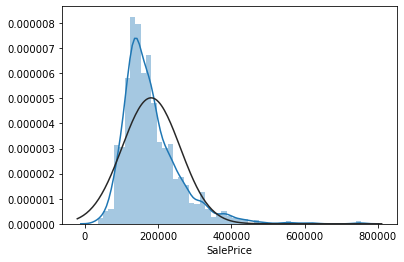

In [19]:
# Distribution of dependent variable - SalePrice
sns.distplot(df['SalePrice'], fit=stats.norm);

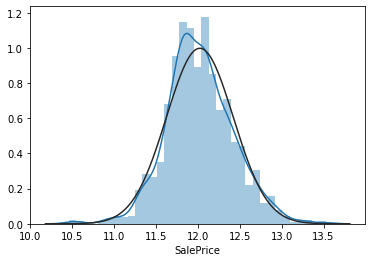

In [20]:
# Distribution of SalePrice is slightly right skewed which may not be optimal for regression model
# Attempt to adjust skewed distribution with log function
sns.distplot(np.log(df['SalePrice']), fit=stats.norm);

In [21]:
# Logarithm of SalePrice fits normal distribution and therefore will be better to be used for linear regression
# Add a column 
df = df.assign(sp_log=np.log(df['SalePrice']))

In [22]:
df['sp_log'].describe()

count    1459.000000
mean       12.024048
std         0.399589
min        10.460242
25%        11.774905
50%        12.001505
75%        12.273731
max        13.534473
Name: sp_log, dtype: float64

#### 2.4 Outliers
- Plot to visualize observations and find outliers (Numerical variables only)
- We will focus on variables that are highly related to SalePrice

In [23]:
# Number of Numeric independent variables : 47 - 2 (SalePrice & sp_log) = 45
len(df.select_dtypes(np.number).columns)

46

In [24]:
# Select the column whose correlation coefficient with SalePrice is more than 0.5
df.corr()['sp_log'][abs(df.corr()['sp_log'])>0.5].sort_values(ascending=False)[2:]

OverallQual     0.817368
GrLivArea       0.700941
GarageCars      0.680645
ExterQual       0.678956
KitchenQual     0.668011
BsmtQual        0.657218
GarageArea      0.650916
TotalBsmtSF     0.612642
1stFlrSF        0.597218
FullBath        0.594891
YearBuilt       0.586827
YearRemodAdd    0.565822
TotRmsAbvGrd    0.534436
GarageYrBlt     0.500682
Name: sp_log, dtype: float64

In [25]:
# In total 14 cols
corr_cols = list(df.corr()['sp_log'][abs(df.corr()['sp_log'])>0.5].sort_values(ascending=False)[2:].index)
corr_cols

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'ExterQual',
 'KitchenQual',
 'BsmtQual',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt']

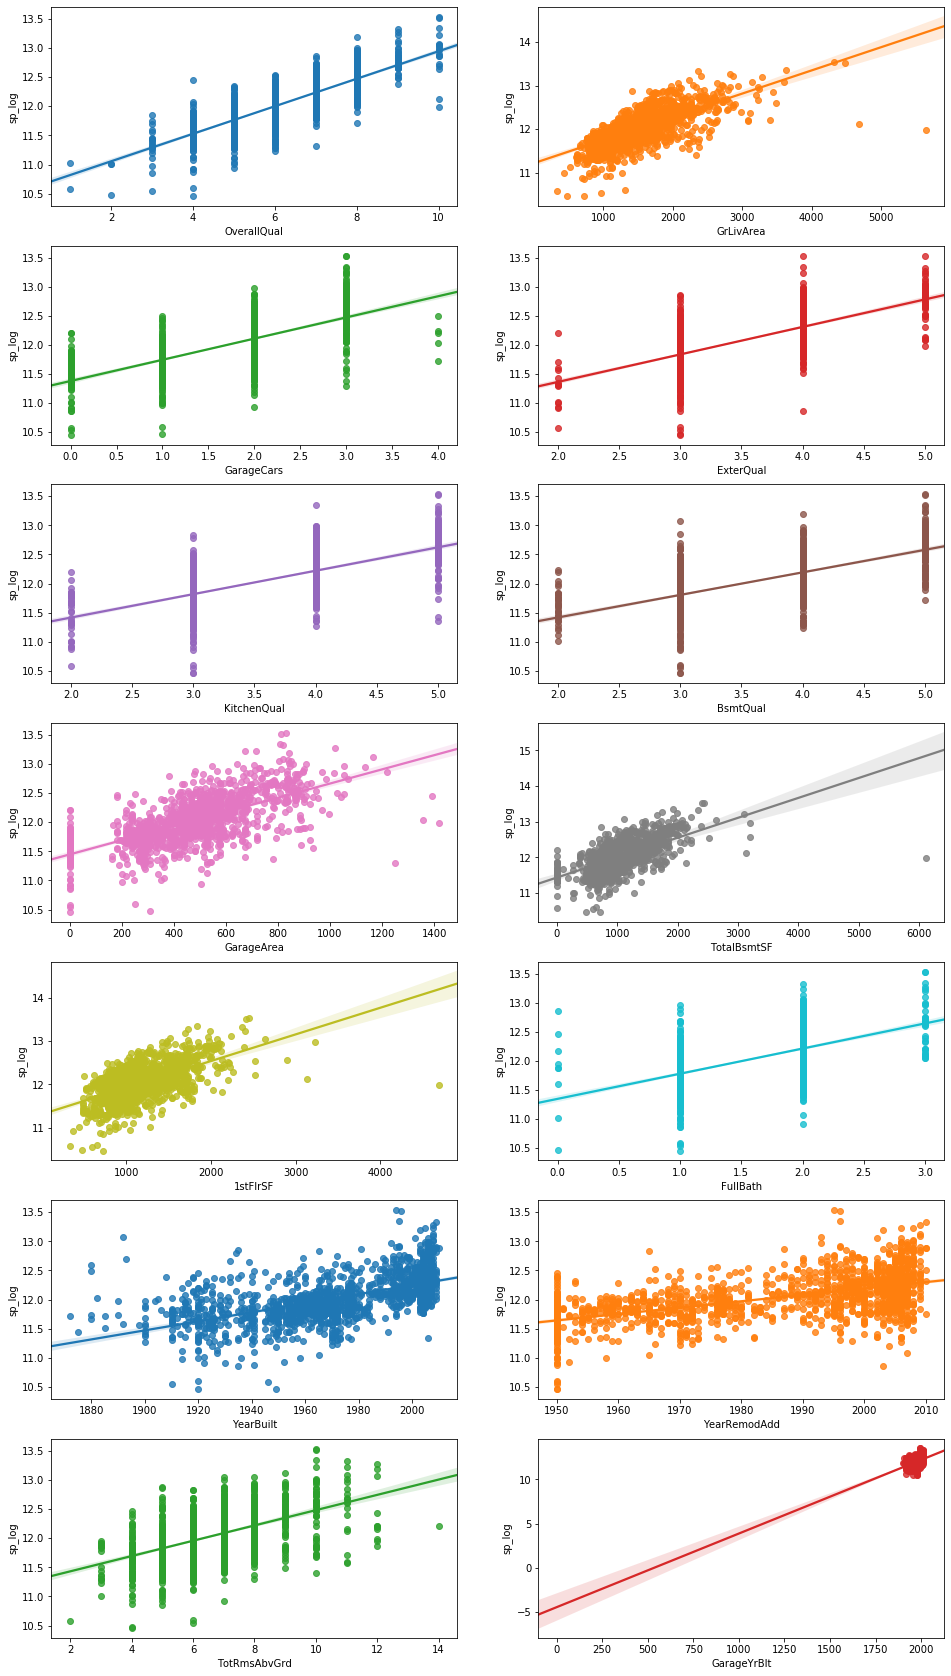

In [26]:
# Visualize observations (SalePrice with Corr_cols) 
# Check outliers
fig, ax = plt.subplots (nrows=7,ncols=2,figsize = (16,30))

i=0
for row in range(0,7):
    for col in range(0,2):
        sns.regplot(data=df,x=corr_cols[i], y='sp_log', ax=ax[row,col]);
        i+=1

- The following observations have high value on features but unexpectedly low selling price. 
- We will remove those outliers to improve accuracy of regression model 

In [27]:
# GriLivArea: the two biggest values with more than 4000 sqft
df = df.drop(df.nlargest(2,'GrLivArea').index)

In [28]:
# GarageArea: the biggest 4 values with more than 1200 sqft
df = df.drop(df.nlargest(4,'GarageArea').index)

In [29]:
# TotalBsmtSF: the biggest value with more than 6000 sqft
df = df.drop(df.nlargest(1,'TotalBsmtSF').index)

In [30]:
# 1stFlrSF: the biggest 4 values with more than 4000 sqft
df = df.drop(df.nlargest(1,'1stFlrSF').index)

In [31]:
# TotrmsAbuGrd: the highest number with more than 14 rooms above ground
df = df.drop(df.nlargest(1,'TotRmsAbvGrd').index)

### 3. Data Exploration

Visualizations:
1. Categorical Variables: Boxplot
2. Numeric Variables: Heatmap

#### 3.1 *Categorical Variables*

In [32]:
# Number of categorical independent variables : 30
len(df.select_dtypes('category').columns)

30

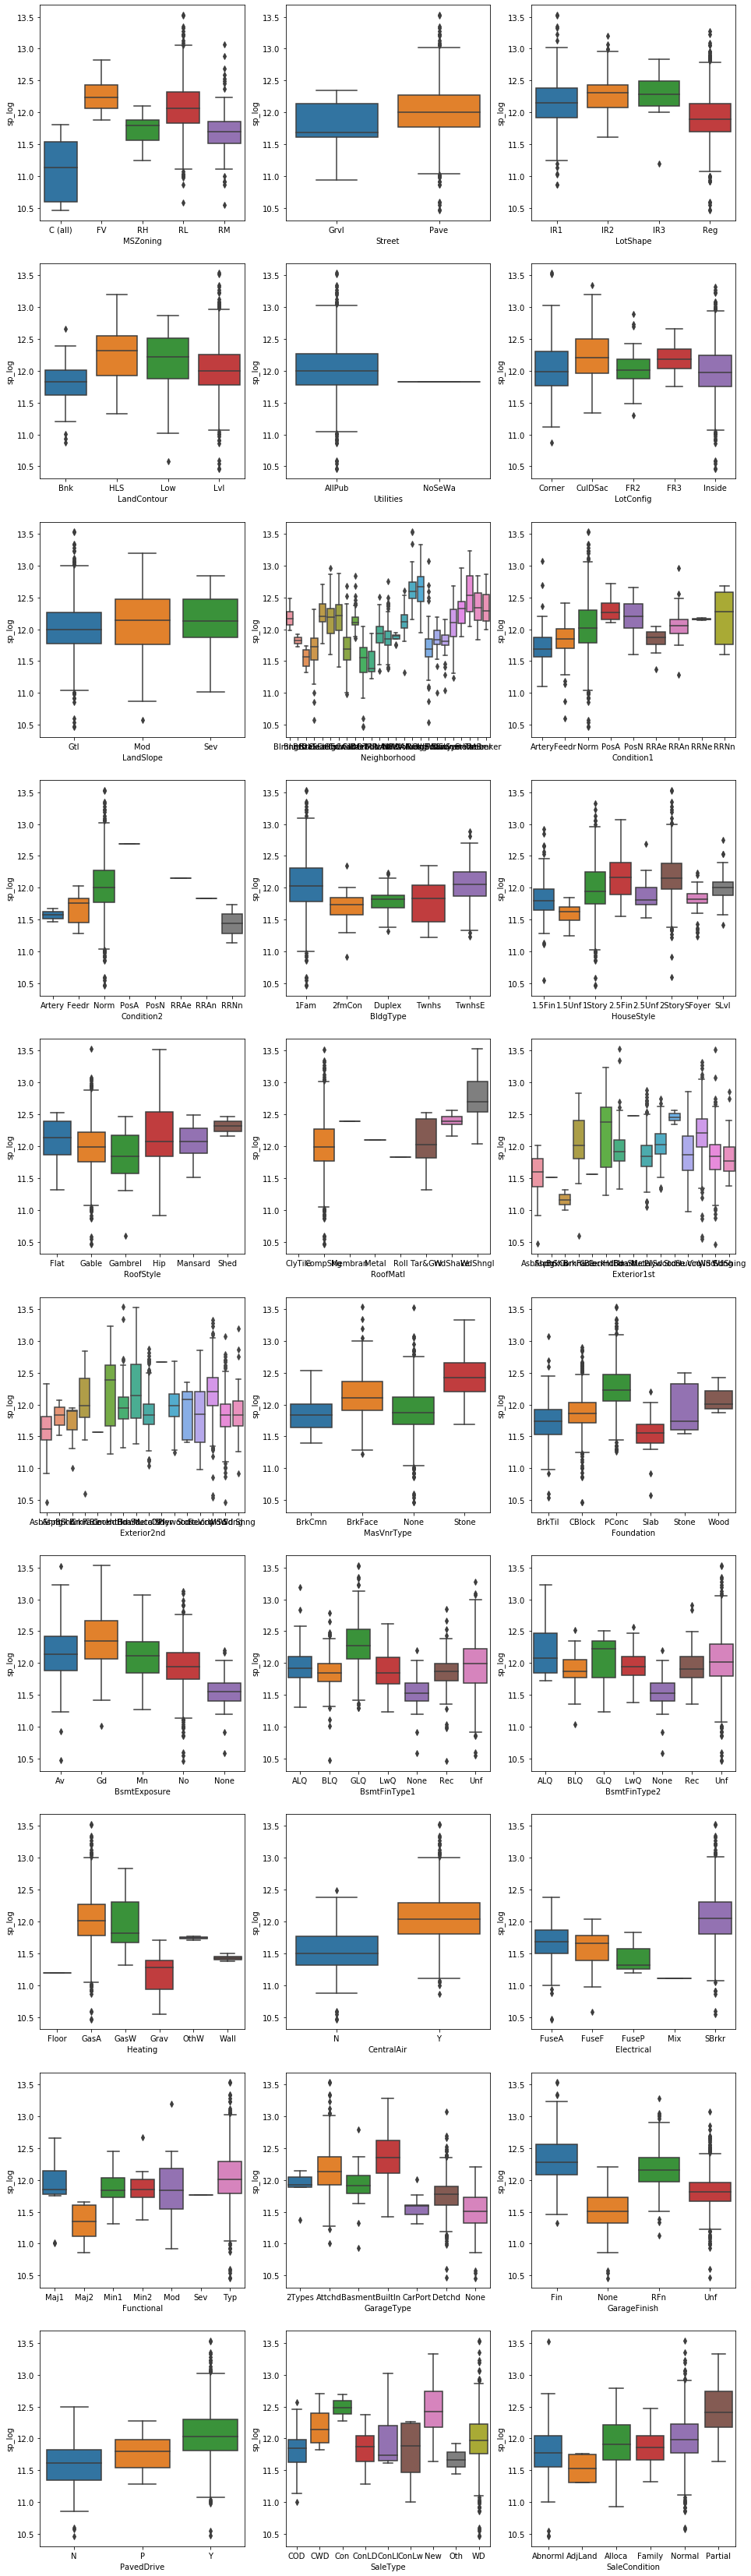

In [33]:
# With boxplot, we can visualize the distributions of categorical variables
cat_cols = list(df.select_dtypes('category').columns)
cat_cols[0]

fig, ax = plt.subplots (nrows=10,ncols=3,figsize = (16,60))

i=0
for row in range(0,10):
    for col in range(0,3):
        sns.boxplot(data=df,x=cat_cols[i], y='sp_log', ax=ax[row,col]);
        i+=1

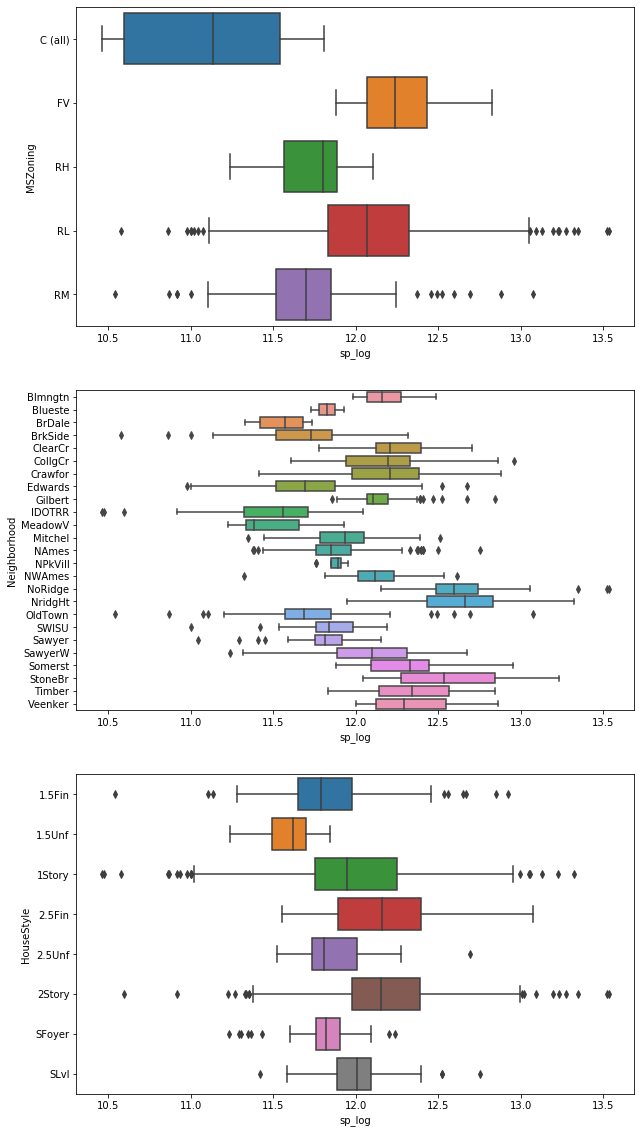

In [ ]:
# Have a closer look on some variables that we intuitively believe have more impant on SalePrice

fig, ax = plt.subplots (nrows=3,ncols=1,figsize = (10,20))
# MSZoning - What type of area is the house located? 
sns.boxplot(data=df,y='MSZoning', x='sp_log',orient='h',ax=ax[0]);
# Neighborhood - In which neghborhood of Ames city is the house located? 
sns.boxplot(data=df,y='Neighborhood', x='sp_log',orient='h',ax=ax[1]);
# HouseStyle - What kind of house is that? 
sns.boxplot(data=df,y='HouseStyle', x='sp_log',orient='h',ax=ax[2]);


Observed Patterns / Hypothesis:
- SalePrice for housing in Commercial zone is more likely to be cheaper
- Houses from Northridge Heights, Stone Brook and Northridge tends to be more expensive 
- Difference in HouseStyle tends to have not much impact on SalePrice

#### 3.2 *Numeric variables*

In [ ]:
# Heatmap: find out correlations among different variables and SalePrice
# Focusing the 14 variables that are most related to SalePrice

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df[corr_cols+['sp_log']].corr());

##### *Multicollinearity*
- From the heatmap, we can detect multicollinearity among the independent variables. Suspected pairs: 

1) 'TotalBsmtSF' and '1stFlrSF'
    - Their correlation coef seems to be over 0.8, meaning that they are highly correlated
    - Drop 1stFlrSF as it is slightly less correlated to SalePrice
2) 'GrLivArea' and 'TotRmsAbvGrd'
    - Correlation Coef is also over 0.8
    - Correlation makes sense for this pair as when Living Area above ground increase, more rooms can be fitted. 
    - Drop TotRmsAbvGrd since GrLivArea is more correlated to SalePrice
3) 'YearBuilt' and 'GarageYrBlt'
    - Correlation Coef is over 0.8
    - The building year of the house and garage are close to each other
    - Drop GarageYrBlt as it is less correlated to SalePrice
4) 'GarageCars' and 'GarageArea'
    - Correlation Coef is over 0.8
    - They are basically both describing the size of garage just with different scales
    - Drop GarageArea 

In [ ]:
to_drop = ['1stFlrSF','TotRmsAbvGrd','GarageYrBlt','GarageCars']
corr_cols_final = [col for col in corr_cols if col not in to_drop]

In [ ]:
corr_cols_final

### 4. Modeling
- with OLS regression

In [ ]:
df = sm.add_constant(df)

In [ ]:
y = df['sp_log']
x = df[['const']+corr_cols_final]
lin_reg = sm.OLS(y,x).fit()

In [ ]:
lin_reg.summary()

### *p-values*
- p-value for each term tests the null hypothesis that the coef is equal to zero (no effect). 
- Assuming level of significance = 5%, p-values in most of the terms are lower than 0.05
- Good indication to reject the null hypothesis.  

In [ ]:
# Modification:
# Remove 'ExterQual' in the model which have high p-value and therefore are more likely to have no impact on SalePrice
corr_cols_final.remove('ExterQual')


In [ ]:
# Second Trial:
y = df['sp_log']
x = df[['const']+corr_cols_final]
lin_reg2 = sm.OLS(y,x).fit()
lin_reg2.summary()

### 5. Summary:

Top 10 factors affecting Housing sale price:

Positive correlated: Saleprice increases when those factors increase:
    - Overall Quality of the house
    - Living Area above ground
    - Quality of the kitchen
    - Quality of basement
    - Size of Garage
    - Size of Basement
    - year built
    - year remodeled
Negative correlated: Saleprice decrease when this factor increases:
    - Number of Full Bathrooms (Suprisingly)